In [1]:
!unzip Cat.zip
!mv ResizedCat Cat

"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"mv" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [2]:
!unzip Dog.zip
!mv ResizedDog Dog

"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"mv" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [3]:
!pip install --upgrade pip
!pip install pandas numpy matplotlib scikit-learn

     ---------------------------------------- 2.0/2.0 MB 7.7 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\se_pe\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 10.5/10.5 MB 11.7 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 15.9 MB/s eta 0:00:00
     ---------------------------------------- 7.4/7.4 MB 17.4 MB/s eta 0:00:00
     -------------------------------------- 503.5/503.5 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 55.3/55.3 kB 115.4 kB/s eta 0:00:00
     -------------------------------------- 944.1/944.1 kB 4.6 MB/s eta 0:00:00
     --------------------------------------- 38.6/38.6 MB 12.1 MB/s eta 0:00:00
     ------------------------------------ 307.0/307.0 kB 655.0 kB/s eta 0:00:00


In [4]:
!pip install tensorflow

     -------------------------------------- 444.1/444.1 MB 5.7 MB/s eta 0:00:00
     ------------------------------------ 123.4/123.4 kB 380.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.6/1.6 MB 8.0 MB/s eta 0:00:00
     -------------------------------------- 42.6/42.6 kB 159.3 kB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 2.7 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 272.1 kB/s eta 0:00:00
     -------------------------------------- 895.5/895.5 kB 5.7 MB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 231.5 kB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 11.2 MB/s eta 0:00:00
     -----------------


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Step 0. Load libraries and custom modules
# System --------------------------------------------------------
import os
import pathlib
# Dataframes and matrices ---------------------------------------
import numpy as np
import pandas as pd
# Graphics ------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Machine learning ----------------------------------------------
from sklearn.model_selection import train_test_split
# Deep learning -------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import get_file
from keras.utils import image_dataset_from_directory

In [6]:
# Sample a cat image
sample_cat = mpimg.imread('Cat/image3814.jpg')
plt.imshow(sample_cat)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Cat/image3814.jpg'

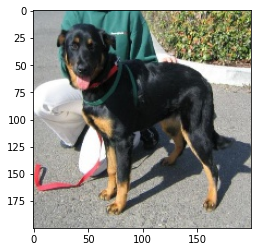

In [ ]:
# Sample a dog image
sample_dog = mpimg.imread('Dog/image8941.jpg')
plt.imshow(sample_dog)
plt.show()

In [9]:
# Count total images
data_dir = pathlib.Path('./')
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

24946

In [10]:
# Let's follow this tutorial: https://www.tensorflow.org/tutorials/load_data/images
# Create train dataset
IMAGE_WITDH = 200
IMAGE_HEIGHT = 200
BATCH_SIZE = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(200, 200),
  batch_size=32)

Found 24946 files belonging to 4 classes.
Using 19957 files for training.


In [11]:
# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(200, 200),
  batch_size=32)

Found 24946 files belonging to 4 classes.
Using 4989 files for validation.


In [12]:
# Read the classes
class_names = train_ds.class_names
print(class_names)

['ResizedCat', 'ResizedDog', '__pycache__', 'kagglecatsanddogs_5340']


In [13]:
# Create the deep learning architecture
IMAGE_CHANNELS=3
IMAGE_WIDTH=200
IMAGE_HEIGHT=200
model = Sequential([

Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(),
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='sigmoid'), # 2 because we have cat and dog classes
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 97, 97, 64)       2

In [14]:
# Fit the model
history=model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
624/624 [==============================] - 713s 1s/step - loss: 0.6591 - accuracy: 0.6750 - val_loss: 0.8344 - val_accuracy: 0.5173
Epoch 2/10
624/624 [==============================] - 728s 1s/step - loss: 0.4865 - accuracy: 0.7655 - val_loss: 0.4814 - val_accuracy: 0.7731
Epoch 3/10
624/624 [==============================] - 735s 1s/step - loss: 0.4220 - accuracy: 0.8067 - val_loss: 0.4942 - val_accuracy: 0.7777
Epoch 4/10
624/624 [==============================] - 748s 1s/step - loss: 0.3730 - accuracy: 0.8327 - val_loss: 5.8185 - val_accuracy: 0.4927
Epoch 5/10
624/624 [==============================] - 745s 1s/step - loss: 0.3186 - accuracy: 0.8605 - val_loss: 0.4819 - val_accuracy: 0.7823
Epoch 6/10
624/624 [==============================] - 754s 1s/step - loss: 0.3189 - accuracy: 0.8628 - val_loss: 0.4241 - val_accuracy: 0.8242
Epoch 7/10
624/624 [==============================] - 719s 1s/step - loss: 0.2377 - accuracy: 0.9005 - val_loss: 0.6452 - val_accuracy: 0.7767

In [15]:
import pickle 
filename = '../models/image-classifire-cat-and-dog_Model.pickle'
pickle.dump(history, open(filename,'wb'))

INFO:tensorflow:Assets written to: ram://a4dc4aba-100f-40e6-b417-f6137144ae2e/assets


INFO:tensorflow:Assets written to: ram://a4dc4aba-100f-40e6-b417-f6137144ae2e/assets
